<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 7</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

## Introducción

En este notebook se dan tres rutinas: una que aproxima integrales definidas utilizando el método de Simpson, la segunda calcula el interpolador en la forma de Lagrange de un conjunto de coordenadas y la tercera compara la caonvergencia de los tres métodos de integración vistos: el método del rectángulo, la regla del trapecio y la regla de Simpson.

**Nota:** Se requiere del uso de las paqueterías `SymPy` y `PyPlot`.

In [1]:
using SymPy
using PyPlot

## Regla de Simpson

<div align="justify" style="text-indent:0.5cm">Se implementa la regla de Simpson en un intervalo dado $[a,b]$. Para lo cual se subdivide el intervalo con el _paso_ $h$ y se utiliza en cada subintervalo $[x_{i-1},x_{i}]$ la aproximación:</div>

$$\int_{x_{i-1}}^{x_{i}}f(x)\:dx\approx\frac{x_{i}-x_{i-1}}{6}\left[f\bigl(x_{i-1}\bigr)+4f\Bigl(\frac{x_{i-1}+x_{i}}{2}\Bigr)+f\bigl(x_{i}\bigr)\right]$$

$$\int_{x_{i-1}}^{x_{i}}f(x)\:dx\approx\frac{h}{6}\left[f\bigl(a+ih-h\bigr)+4f\Bigl(a+ih-\frac{h}{2}\Bigr)+f\bigl(a+ih\bigr)\right]$$

In [2]:
function regla_simpson(f,a,b,n)
    
    I=0                                                 # Variable a la que se le irá sumando las aproximaciones del método.
    h=(b-a)/n                                           # Paso del método.
    
    for i in 1:n                                        # En cada iteración del ciclo for se trabaja con el siguiente subintervalo.
        S=(h/6)*(f(a+i*h-h)+4*f(a+i*h-h/2)+f(a+i*h))    # Aproximación de la integral para el i-ésimo subintervalo por la regla del trapecio.
        I=I+S                                           # Aquí se le va agregando a la variable I las aproximaciones, de modo que al final
    end                                                 # del ciclo for se tendrá que I se aproxima a la integral de f en [a,b].
    
    return I                                            # La salida del programa es I.
    
end;

In [3]:
f(x)=x^2;

In [4]:
regla_simpson(f,-3,3,2)

18.0

## Método de interpolación de Lagrange

Dado un conjunto de $k$ puntos $(x_{1},y{1}),\dots,(x_{k},y_{k})$, en donde $x_{i}\neq x_{j}$ para $i\neq j$, la interpolación polinomial en la forma de Lagrange es una combinación lineal:

$$L(x):= \sum_{j=1}^{k}y_{j}l_{j}(x)$$

de las bases polinomiales de Lagrange

$$l_{j}(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_{m}}{x_{j}-x_{m}}.$$

Se implementa un programa que genera el interpolador polinomial en la forma de Lagrange.

In [5]:
function interpolador(x,y,x0="none")
    
    if length(x) != length(y)   # ---------- Esta condición sirve sólo para terminar el programa en el caso de que los vectores dados no tengan el mismo número de componentes.
        return print("Los vectores no son de la misma dimensión.")
    end
    
    w = Sym("w")   # ----------------------- Variabla simbólica w.
    k = length(x)  # ----------------------- Longitud del vector u, que es igual al número de puntos.
    l = []         # ----------------------- Variable l en la que se irán guardando las bases polinomiales de Lagrange.
    L0 = 0         # ----------------------- Variable que nos servirá para generar el interpolador de Lagrange.
    
    for j in 1:k         # ----------------- Este ciclo for genera las bases, en cada iteración se genera una base.
        z = 1            # ----------------- Variable que se usará para generar las bases polinomiales de Lagrange.
        for m in 1:j-1   # ----------------- Ciclo for que ejecuta el producto indicada por la fórmula de las bases. Se ejecuta hasta j-1.
            z = z * (w-x[m])/(x[j]-x[m])   # Fórmula de las bases polinomiales de Lagrange.
        end
        for m in j+1:k   # ----------------- Se continua el ciclo de productos a partir de j+1 y hasta k, los dos ciclos sirven para evitar el caso m=j.
            z = z * (w-x[m])/(x[j]-x[m])   # Fórmula de las bases polinomiales de Lagrange.
        end
        push!(l,z)       # ----------------- Se agrega la j-ésima base polinomial a la j-ésima entrada de l.
    end
    
    for j in 1:k                  # -------- Ciclo que sirve para ejecutar la suma de la fórmula del interpolador.
        L0 = L0 + y[j]*l[j]       # -------- Fórmula del interpolador polinomial de Lagrange.
    end
    
    global L = lambdify(L0,[w])   # -------- Se pasa el interpolador de Lagrange de variables simbólicas o código en Julia. Se hace una variable global para que se pueda usar fuera de la función. 
    
    if x0 != "none"               # Condición que hace que si en la función no se recibe el punto x0, entonces no habrá salida
        return L0(x0)             # En el caso de que se de x0, la salida es el interpolador evaluado en x0.
    end
    
end;

In [6]:
x=linspace(1,10,10);

In [7]:
y=x.^2;

In [9]:
interpolador(x,y,x[2])

4.00000000000000

* Interpolación de la función $\cos(x)$ en 10 puntos uniformemente distribuidos en $[0,2\pi]$.

In [10]:
x=linspace(0,2*pi,10);

In [11]:
y=cos.(x);

In [12]:
interpolador(x,y)

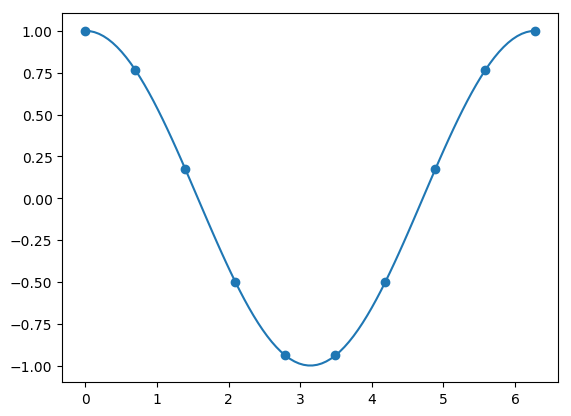

In [13]:
scatter(x,y)
z=linspace(0,2*pi,100);
plot(z,L(z));

* Interpolación de la función $\cos^{2}(x)$ en 10 puntos uniformemente distribuidos en $[0,2\pi]$.

In [14]:
x=linspace(0,2*pi,10);

In [15]:
y=(cos.(x)).^2;

In [16]:
interpolador(x,y)

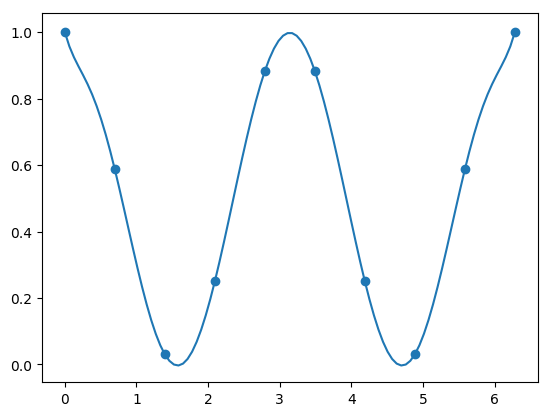

In [17]:
scatter(x,y)
z=linspace(0,2*pi,100);
plot(z,L(z));

* Interpolación de los puntos `(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)`.

In [18]:
x=[0,2,3,4,5,6,7];

In [19]:
y=[10,-10,-4,0,5,20,-1];

In [20]:
interpolador(x,y)

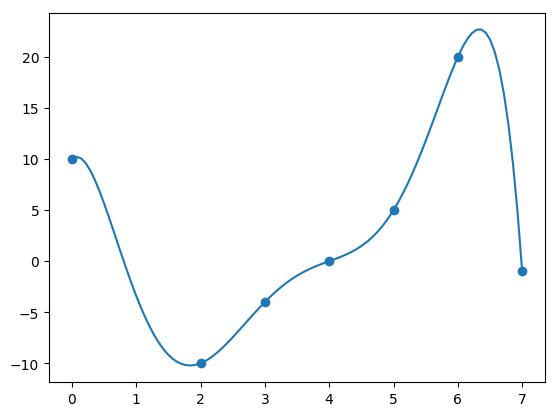

In [21]:
scatter(x,y)
z=linspace(0,7,100);
plot(z,L(z));

La ecuación explícita del polinomio interpolador de arriba es:

In [22]:
simplify(interpolador(x,y,Sym("x")))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

## Convergencia de los métodos de integración

En el notebook `Tarea_6.ipynb` se implementaron los métodos del rectángulo y el trapecio, los cuales son:

In [23]:
function metodo_rectangulo(f,a,b,n)
    
    I=0                       # Variable a la que se le irá sumando las aproximaciones del método.
    h=(b-a)/n                 # Diferencia finita.
    
    for i in 1:n              # En cada iteración del ciclo for se trabaja con el siguiente subintervalo.
        R=h*f(a+(i-1/2)*h)    # Aproximación de la integral para el i-ésimo subintervalo por el método del rectángulo.
        I=I+R                 # Aquí se le va agregando a la variable I las aproximaciones, de modo que al final
    end                       # del ciclo for se tendrá que I se aproxima a la integral de f en [a,b].
    
    return I                  # La salida del programa es precisamente I.
    
end;

In [24]:
function regla_trapecio(f,a,b,n)
    
    I=0                                  # Variable a la que se le irá sumando las aproximaciones del método.
    h=(b-a)/n                            # Paso del método.
    
    for i in 1:n                         # En cada iteración del ciclo for se trabaja con el siguiente subintervalo.
        T=(h/2)*(f(a+i*h-h)+f(a+i*h))    # Aproximación de la integral para el i-ésimo subintervalo por la regla del trapecio.
        I=I+T                            # Aquí se le va agregando a la variable I las aproximaciones, de modo que al final
    end                                  # del ciclo for se tendrá que I se aproxima a la integral de f en [a,b].
    
    return I                             # La salida del programa es I.
    
end;

In [25]:
function convergence(f,a,b,n)
    
    R = []         # Variable que almacenará el valor del la integral dado por el método del rectángulo. 
    T = []         # Variable que almacenará el valor del la integral dado por el método del trapecio. 
    S = []         # Variable que almacenará el valor del la integral dado por el método de Simpson. 
    h = []         # Variable que almacenará el valor del la integral dado por el método del rectángulo. 
    x = Sym("x")   # Variable simbólica x.
    g = f(x)       # Se pasa la función en Julia introducida f a una función simbólica g.
    I = ones(length(n))*integrate(g,(x,a,b))   # Vector columna cuyas entradas son todas el valor exacto de la integral. 
    
    for i in 1:length(n)   # El ciclo sirve para calcular para varios anchos de celda el valor aproximado de la integral dado por los métodos. 
        push!(R, metodo_rectangulo(f,a,b,n[i]) )
        push!(T, regla_trapecio(f,a,b,n[i]) )
        push!(S, regla_simpson(f,a,b,n[i]) )
        push!(h, n[i]/(b-a) )
    end
    
    return R,T,S,h,I   # El output es un vector con primera entrada R, segunda T, tercer S, cuarta h y quinta I.
    
end;

In [26]:
f(x)=-sin(x);

In [27]:
n=1:20;

In [28]:
C=convergence(f,0,2*pi,n);

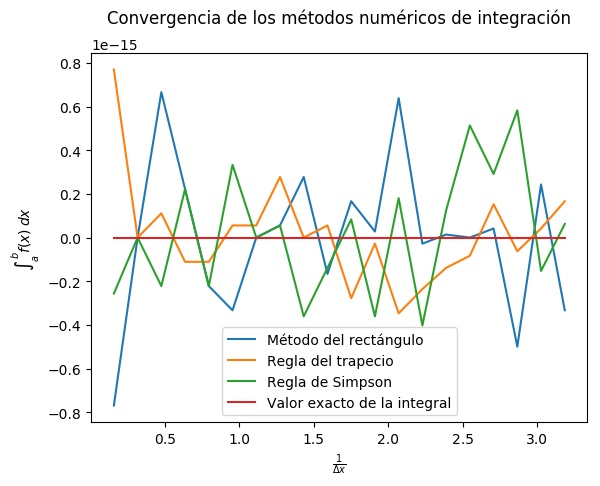

In [29]:
xlabel(L"$\frac{1}{\Delta x}$")
ylabel(L"$\int_{a}^{b}f(x)\:dx$")
title("Convergencia de los métodos numéricos de integración\n")
plot(C[4],C[1],label="Método del rectángulo")
plot(C[4],C[2],label="Regla del trapecio")
plot(C[4],C[3],label="Regla de Simpson")
plot(C[4],C[5],label="Valor exacto de la integral")
legend()
show();

Lo que se observa en esta gráfica es que los tres métodos son estables y tienden al valor de la integral, que en este caso es 0, sin embargo todas presentan un comportamiente oscilante alrededor del valor exacto, y con esta gráfica no es posible decir que método converge más rápido. Se observa que para valores grandes del paso (es decir $1/\Delta x$ pequeño) el método de Simpson es el que comienza con un valor más cercano a la integral respecto a los otros dos métodos, pero sus comportamientos se confunden entre menor sea el ancho de la celda. El comportamiento oscilatorio de la convergencia se hereda de la función `sen`.

Si se utiliza otra función, por ejemplo una cuadrática u otras tales como $e^{-x^{2}}$, entonces en la gráfica en ocasiones se llega a distinguir la convergencia, siendo el método de Simpson el que converge más rápido, seguido del método del rectángulo y al final el método del trapecio.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>